# **Santander Product Recommendation**

https://www.kaggle.com/competitions/santander-product-recommendation/data?select=train_ver2.csv.zip

This project is posted by Santander Bank. They provide loans for down payments on houses, leverage the equity in homes, help with financial decisions, and offer assistance in recommending personalized products.

This particular project aims to predict which product their existing customers will use in the next month based on their past behavior and that of similar customers.

The data consists of 1.5 years of customer behavior data from Santander Bank to predict what new product customers will purchase. The data starts on 01-28-2015 and ends on 06-28-2016. We are supposed to predict what they will purchase in the next month based on the given data.

The data size is 240.06 MB for 3 CSV files. There are 48 columns and around 13 million rows. The columns contain information about the customers, such as age, demographics, and income.

This is a supervised classification problem that is a multiclass problem.

I plan to solve this problem by choosing the important features and using the KNN Machine Learning Model to predict what new product the customers will purchase.

## **Data Loading and Initial Look**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_train.csv')
df

/tmp/ipykernel_374/1811758720.py:1: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_train.csv')


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2016-02-28,989076,N,ES,H,24,2011-12-02,0.0,50,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-06-28,955948,N,ES,H,24,2011-10-06,0.0,45,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-08-28,1231387,N,ES,H,21,2013-12-13,0.0,20,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-04-28,1027719,N,ES,V,26,2012-07-20,0.0,36,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2016-05-28,449863,N,ES,V,68,2003-12-22,0.0,149,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2015-09-28,316351,N,ES,V,55,2002-01-21,0.0,164,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999996,2016-03-28,523807,N,ES,V,47,2005-03-18,1.0,4,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,2016-05-28,305431,N,ES,H,47,2001-12-07,0.0,173,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999998,2015-12-28,402302,N,ES,V,71,2003-01-20,0.0,155,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


The first thing I did was use Ubuntu to randomly pick one million rows from the six million rows because the data is too big for my laptop. However, the data still seems too big to work with right now, so I want to pick 100,000 random rows to make it easier.

I also noticed that the last 24 columns are the target, so I have to try and combine them or find a way to make it easier for the model to read.


In [3]:
print(df.shape)

(1000000, 48)


In [4]:
df = df.sample(n=100000, random_state=42)

In [5]:
print(df.shape)

(100000, 48)


I picked out 100,000 rows to make it easier to work on my laptop because it has low memory.


In [6]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

These are the targets: 

'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

At first glance, I think the most important features are pais_residencia, sexo, age, indrel_1mes, tiprel_1mes, indresi, tipodom, cod_prov, nomprov, renta, and segmento. These columns tell us who the customers are and their status within the bank.


In [7]:
print(df.dtypes)

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

Some of these rows have incorrect data types. For example, fecha_dato and fecha_alta should be in date format. Additionally, age should not be an object but should be a float64.


In [8]:
df.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.000000e+05,99824.000000,99824.000000,99824.0,99375.000000,99824.000000,7.961800e+04,100000.000000,100000.0,100000.00000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99891.000000,99891.000000,100000.000000
mean,8.359301e+05,0.058974,1.158058,1.0,26.592584,0.456784,1.359412e+05,0.000140,0.0,0.65534,...,0.006220,0.008830,0.002840,0.051670,0.043740,0.025520,0.003750,0.054930,0.059895,0.127290
std,4.299500e+05,0.235577,3.932540,0.0,12.776400,0.498131,2.801150e+05,0.011831,0.0,0.47526,...,0.078622,0.093553,0.053216,0.221361,0.204517,0.157699,0.061123,0.227844,0.237294,0.333299
min,1.591500e+04,0.000000,1.000000,1.0,1.000000,0.000000,1.202730e+03,0.000000,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.558335e+05,0.000000,1.000000,1.0,15.000000,0.000000,6.908859e+04,0.000000,0.0,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.335150e+05,0.000000,1.000000,1.0,28.000000,0.000000,1.021944e+05,0.000000,0.0,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.198974e+06,0.000000,1.000000,1.0,35.000000,1.000000,1.568158e+05,0.000000,0.0,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.553450e+06,1.000000,99.000000,1.0,52.000000,1.000000,2.554725e+07,1.000000,0.0,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


I need to fix the data types, but from the 31 columns that are being shown, there are no outliers and the data seems normalized.


In [9]:
df.count()

fecha_dato               100000
ncodpers                 100000
ind_empleado              99824
pais_residencia           99824
sexo                      99823
age                      100000
fecha_alta                99824
ind_nuevo                 99824
antiguedad               100000
indrel                    99824
ult_fec_cli_1t              161
indrel_1mes               98901
tiprel_1mes               98901
indresi                   99824
indext                    99824
conyuemp                      8
canal_entrada             98612
indfall                   99824
tipodom                   99824
cod_prov                  99375
nomprov                   99375
ind_actividad_cliente     99824
renta                     79618
segmento                  98588
ind_ahor_fin_ult1        100000
ind_aval_fin_ult1        100000
ind_cco_fin_ult1         100000
ind_cder_fin_ult1        100000
ind_cno_fin_ult1         100000
ind_ctju_fin_ult1        100000
ind_ctma_fin_ult1        100000
ind_ctop

There are a lot of missing rows that need to be removed. Two of the main columns with missing data are conyuemp and ult_fec_cli_1t. These columns have information in fewer than 200 rows, so they need to be removed.

In [10]:
missing_value=df.isnull().sum()
print("Missing Data: \n", missing_value)

Missing Data: 
 fecha_dato                   0
ncodpers                     0
ind_empleado               176
pais_residencia            176
sexo                       177
age                          0
fecha_alta                 176
ind_nuevo                  176
antiguedad                   0
indrel                     176
ult_fec_cli_1t           99839
indrel_1mes               1099
tiprel_1mes               1099
indresi                    176
indext                     176
conyuemp                 99992
canal_entrada             1388
indfall                    176
tipodom                    176
cod_prov                   625
nomprov                    625
ind_actividad_cliente      176
renta                    20382
segmento                  1412
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1      

This proves that I need to remove conyuemp and ult_fec_cli_1t. I also think I should remove the rows with missing values in the renta and segmento columns instead of replacing them because there is enough data.


# **Data Cleaning**

In [13]:
for i in df.columns:
    print(f"{i}\n", df[i].unique(), "\n", f"Values = {df[i].unique().size}\n")

fecha_dato
 ['2015-11-28' '2016-02-28' '2016-01-28' '2015-10-28' '2016-03-28'
 '2015-08-28' '2015-01-28' '2015-05-28' '2015-09-28' '2015-02-28'
 '2016-05-28' '2015-03-28' '2015-12-28' '2016-04-28' '2015-06-28'
 '2015-07-28' '2015-04-28'] 
 Values = 17

ncodpers
 [ 648897  921496  763980 ...  666272  791301 1042952] 
 Values = 94843

ind_empleado
 ['N' nan 'A' 'F' 'B'] 
 Values = 5

pais_residencia
 ['ES' 'FR' 'DE' 'MX' nan 'RO' 'BO' 'IE' 'BE' 'CO' 'VE' 'GB' 'CL' 'HR' 'CU'
 'BR' 'US' 'RU' 'AR' 'IL' 'IT' 'TH' 'AO' 'EC' 'PY' 'PE' 'SE' 'MM' 'MZ'
 'CH' 'DZ' 'UY' 'MA' 'JP' 'DO' 'PT' 'PL' 'NL' 'AE' 'EE' 'CM' 'AT' 'BG'
 'FI' 'SG' 'GR' 'GQ' 'HN' 'CA' 'KR' 'NI' 'CN' 'SN' 'UA' 'EG' 'KH' 'IN'
 'AU' 'DK' 'CI' 'SA' 'MR'] 
 Values = 62

sexo
 ['V' 'H' nan] 
 Values = 3

age
 [' 37' ' 24' ' 70' ' 46' ' 22' ' 57' ' 43' ' 25' ' 39' ' 31' ' 45' ' 23'
 ' 21' ' 35' ' 48' ' 47' ' 50' ' 20' ' 51' ' 38' ' 36' ' 44' ' 67' ' 87'
 ' 65' ' 60' ' 30' ' 56' '104' ' 52' ' 68' ' 27' ' 80' ' 59' ' 88' ' 85'
 ' 69' ' 6

This clearly indicates that some columns have missing values, as they are listed with unique values.


In [14]:
df["fecha_dato"]=pd.to_datetime(df["fecha_dato"])
print (df["fecha_dato"].dtype)

datetime64[ns]


In [16]:
df["fecha_alta"]=pd.to_datetime(df["fecha_alta"])
print(df["fecha_alta"].dtype)

datetime64[ns]


In [17]:
df["ult_fec_cli_1t"]=pd.to_datetime(df["ult_fec_cli_1t"])
print(df["ult_fec_cli_1t"].dtype)

datetime64[ns]


This changes the data types to the correct form.

In [18]:
print(df['age'])

987231     37
79954      24
567130     70
500891     46
55399      22
         ... 
395942     43
417771     44
937140     63
794022     33
573083     24
Name: age, Length: 100000, dtype: object


The age should not be an object; it should be numerical.


In [19]:
df["age"]=pd.to_numeric(df["age"], errors="coerce")
print(df['age'])

987231    37.0
79954     24.0
567130    70.0
500891    46.0
55399     22.0
          ... 
395942    43.0
417771    44.0
937140    63.0
794022    33.0
573083    24.0
Name: age, Length: 100000, dtype: float64


In [20]:
median_age=df['age'][df['age']>=0].median()
df.loc[df['age']<0,'age']=median_age

This calculates the median age for the age columns. It ensures that any negative age values are replaced with the median of the age column.


In [21]:
negative_age_entries = df[df['age'] < 0]
if not negative_age_entries.empty:
    print("Negative entries found in the age column:")
    print(negative_age_entries)
else:
    print("No negative entries found in the age column.")

No negative entries found in the age column.


In [24]:
valid_values = ['1', '2', '3', '4']
def clean_value(x):
    if isinstance(x, str):
        x = x.rstrip('.0')
    return x if str(x) in valid_values else pd.NA

df['indrel_1mes'] = df['indrel_1mes'].apply(clean_value)

In [25]:
unique_values = df['indrel_1mes'].unique()
print(unique_values)

[<NA> '1' '3' '2' '4']


In [26]:
value_counts = df['antiguedad'].value_counts()
print(value_counts)

antiguedad
     12    1715
     21    1561
     10    1505
     23    1326
     33    1261
           ... 
    252       5
    254       2
    253       2
    255       1
    256       1
Name: count, Length: 258, dtype: int64


In [27]:
value_counts = df['renta'].value_counts()
print(value_counts)

renta
451931.22    31
181042.20    16
463625.16    15
105260.88    11
283325.67    11
             ..
79541.73      1
113024.34     1
155533.47     1
212354.58     1
135506.64     1
Name: count, Length: 71290, dtype: int64


In [28]:
invalid_entries=df[df.select_dtypes(include=['number'])<0].count()

print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
ult_fec_cli_1t           0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
conyuemp                 0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_f

There are no invalid entries, but it seems like there are still some N/A entries in a few of the columns.


In [29]:
df.describe()

,fecha_dato,ncodpers,age,fecha_alta,ind_nuevo,indrel,ult_fec_cli_1t,tipodom,cod_prov,ind_actividad_cliente,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,100000,1.000000e+05,99824.000000,99824,99824.000000,99824.000000,161,99824.0,99375.000000,99824.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99891.000000,99891.000000,100000.000000
mean,2015-10-20 04:49:19.487999744,8.359301e+05,40.126713,2009-02-15 05:16:59.009456640,0.058974,1.158058,2015-12-02 12:58:08.198757888,1.0,26.592584,0.456784,...,0.006220,0.008830,0.002840,0.051670,0.043740,0.025520,0.003750,0.054930,0.059895,0.127290
min,2015-01-28 00:00:00,1.591500e+04,2.000000,1995-01-16 00:00:00,0.000000,1.000000,2015-07-01 00:00:00,1.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-06-28 00:00:00,4.558335e+05,24.000000,2004-05-05 00:00:00,0.000000,1.000000,2015-08-28 00:00:00,1.0,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015-10-28 00:00:00,9.335150e+05,39.000000,2011-09-07 00:00:00,0.000000,1.000000,2015-12-17 00:00:00,1.0,28.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016-02-28 00:00:00,1.198974e+06,50.000000,2013-10-18 00:00:00,0.000000,1.000000,2016-02-17 00:00:00,1.0,35.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016-05-28 00:00:00,1.553450e+06,164.000000,2016-05-30 00:00:00,1.000000,99.000000,2016-05-30 00:00:00,1.0,52.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,4.299500e+05,17.162649,NaN,0.235577,3.932540,NaN,0.0,12.776400,0.498131,...,0.078622,0.093553,0.053216,0.221361,0.204517,0.157699,0.061123,0.227844,0.237294,0.333299


The age needs to be adjusted because the maximum age is 164, which seems unrealistic. The minimum age of 24 seems reasonable. Regarding ind_nuevo, although its minimum is 1 and maximum is 99, it indicates if customers are new, which is acceptable.

I think the tipodom column should be removed because it only has one value, so it is not important.


In [30]:
missing_data=df.isnull().sum()
print("Missing data: \n",missing_data)

Missing data: 
 fecha_dato                   0
ncodpers                     0
ind_empleado               176
pais_residencia            176
sexo                       177
age                        176
fecha_alta                 176
ind_nuevo                  176
antiguedad                   0
indrel                     176
ult_fec_cli_1t           99839
indrel_1mes              25565
tiprel_1mes               1099
indresi                    176
indext                     176
conyuemp                 99992
canal_entrada             1388
indfall                    176
tipodom                    176
cod_prov                   625
nomprov                    625
ind_actividad_cliente      176
renta                    20382
segmento                  1412
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1      

I need to remove these missing data.

In [31]:
missing = ['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
           'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
           'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
           'canal_entrada', 'indfall', 'cod_prov',
           'nomprov', 'ind_actividad_cliente', 'segmento']
 
df = df.dropna(subset=missing)
df = df.dropna(subset=['ind_nomina_ult1','ind_nom_pens_ult1','renta', 'tipodom'])

This removes most of the missing values and non-important features.

In [32]:
missing_data=df.isnull().sum()
print("Missing:\n", missing_data)

Missing:
 fecha_dato                   0
ncodpers                     0
ind_empleado                 0
pais_residencia              0
sexo                         0
age                          0
fecha_alta                   0
ind_nuevo                    0
antiguedad                   0
indrel                       0
ult_fec_cli_1t           59590
indrel_1mes                  0
tiprel_1mes                  0
indresi                      0
indext                       0
conyuemp                 59621
canal_entrada                0
indfall                      0
tipodom                      0
cod_prov                     0
nomprov                      0
ind_actividad_cliente        0
renta                        0
segmento                     0
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            

In [33]:
df.shape

(59625, 48)

This allows me to see how many rows have been removed compared to the original data.

In [34]:
df = df.drop('ult_fec_cli_1t', axis=1)
df= df.drop('conyuemp', axis=1)

I wanted to drop these features because almost half of the data is missing, and replacing it with the median would introduce bias.

In [35]:
df.shape

(59625, 46)

In [36]:
num_columns = df.shape[1]
print("Number of columns in the dataset:" , num_columns)

Number of columns in the dataset: 46


Two columns have been removed, but there are still 24 target columns. I am going to see if I can remove some that are not important.


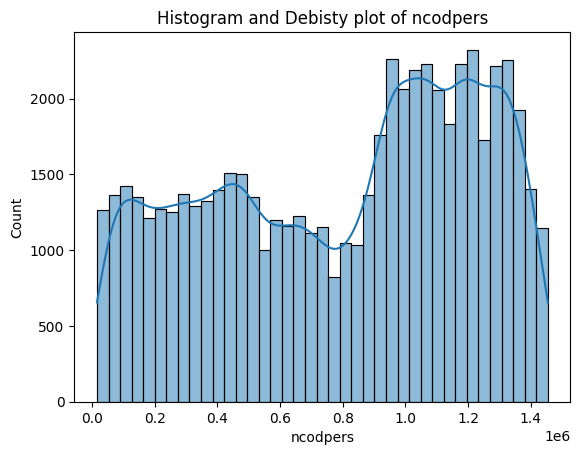

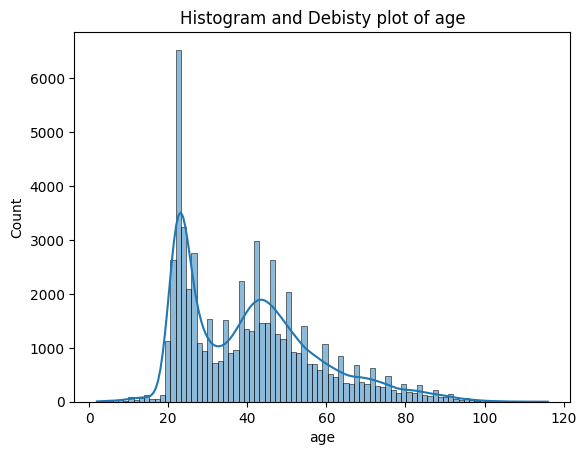

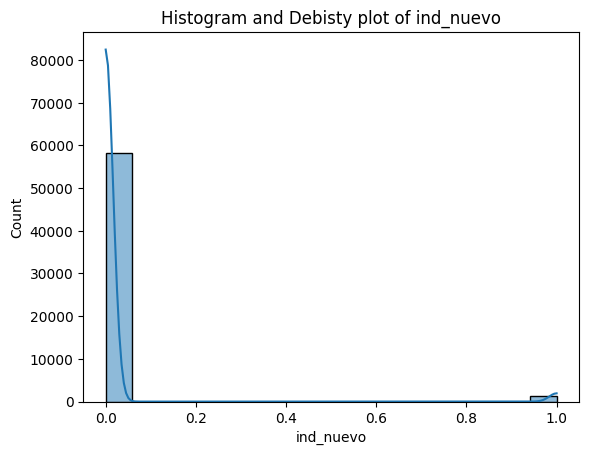

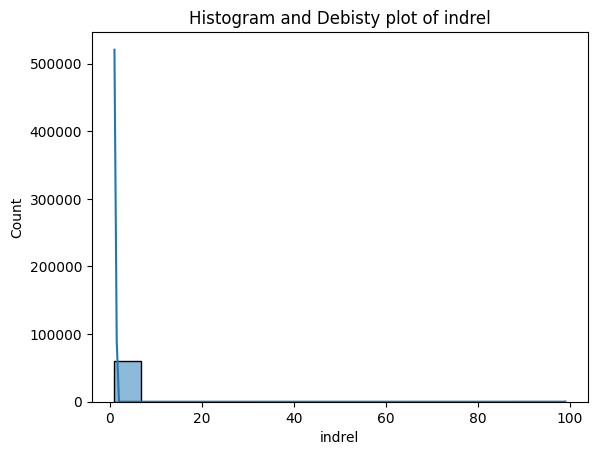

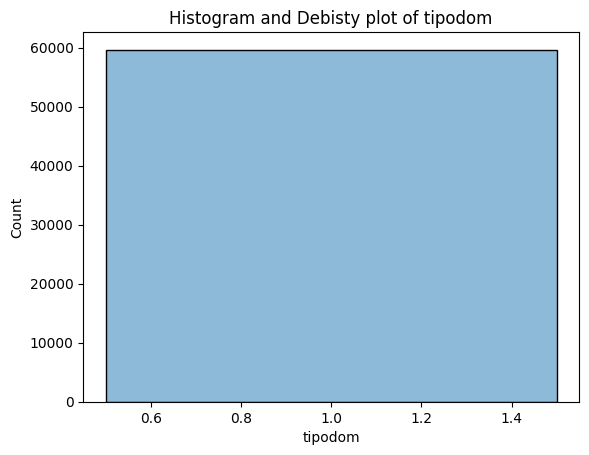

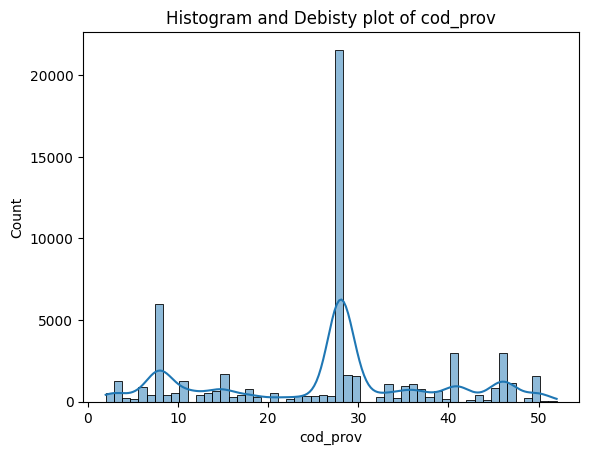

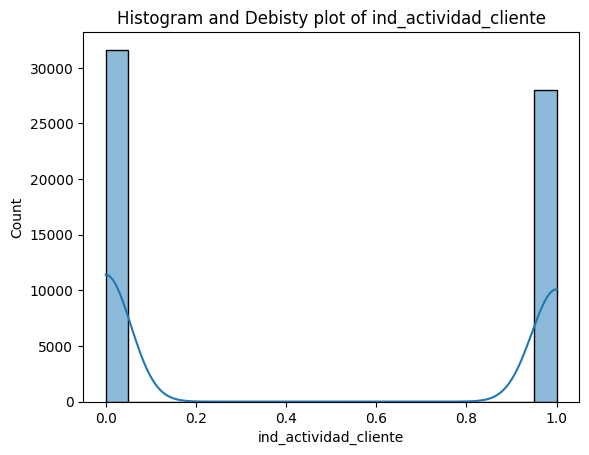

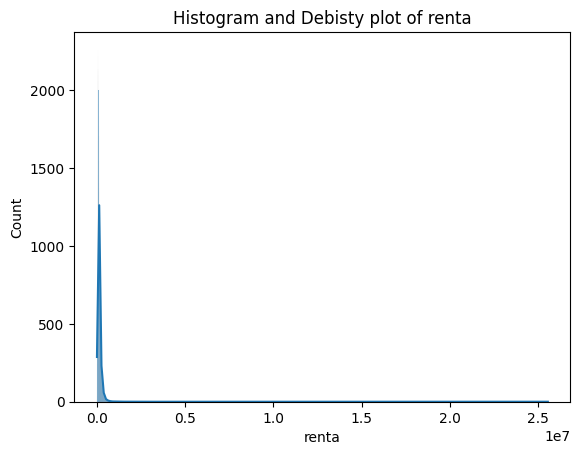

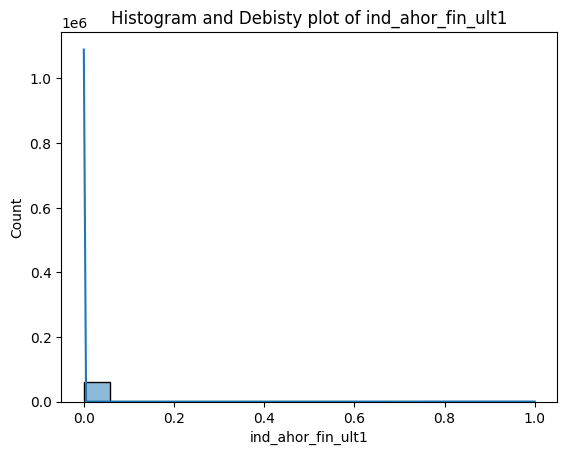

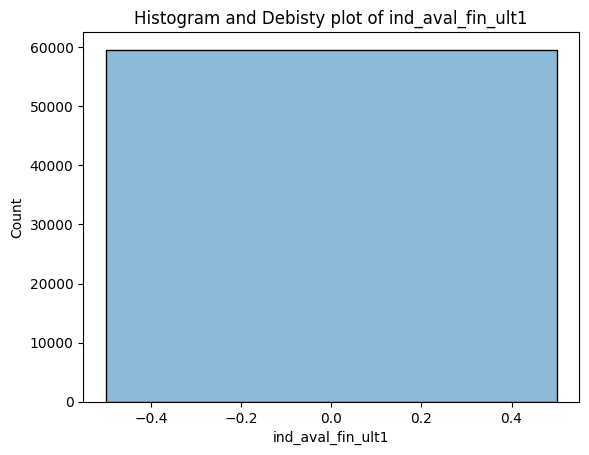

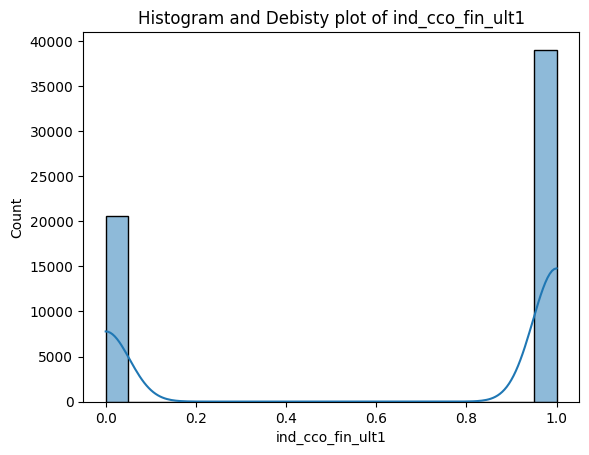

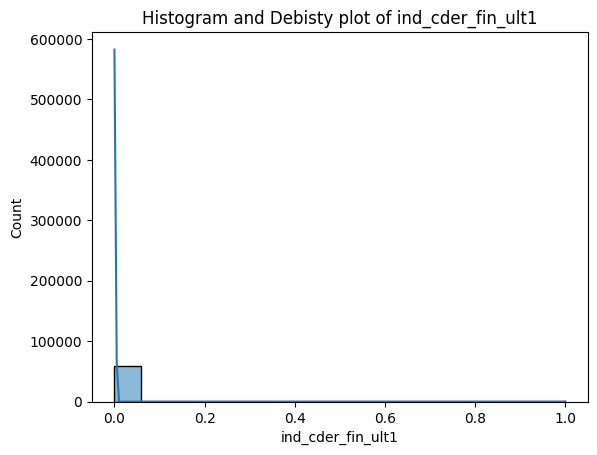

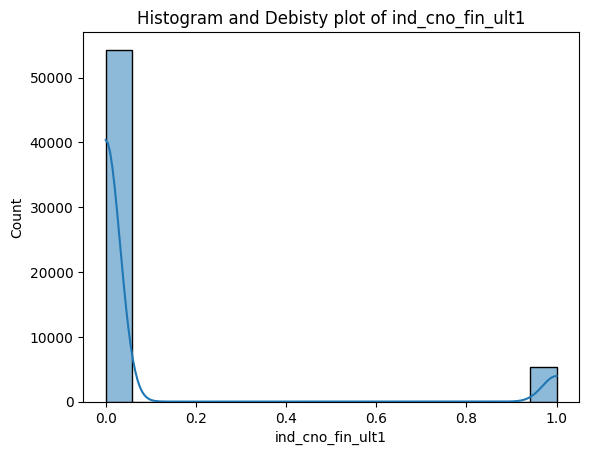

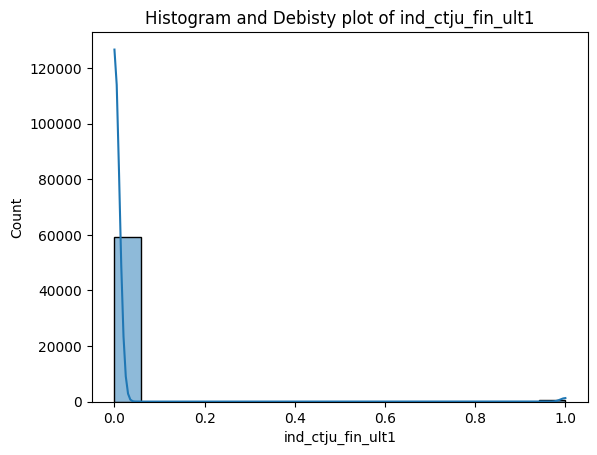

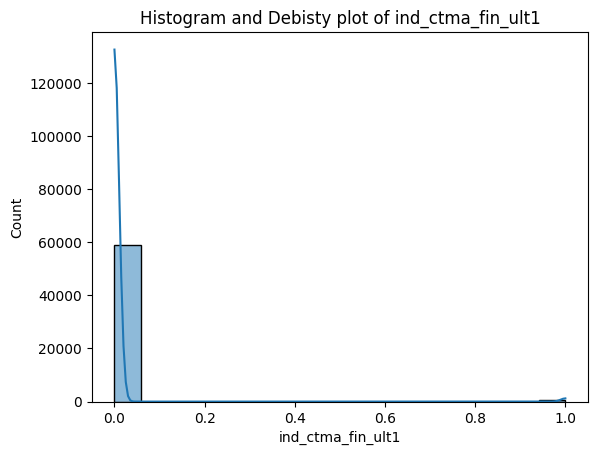

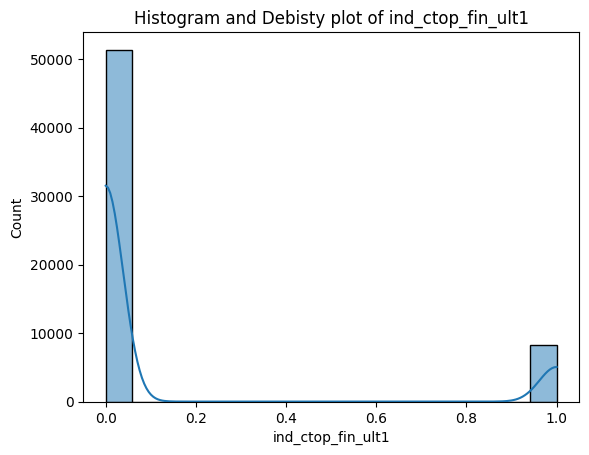

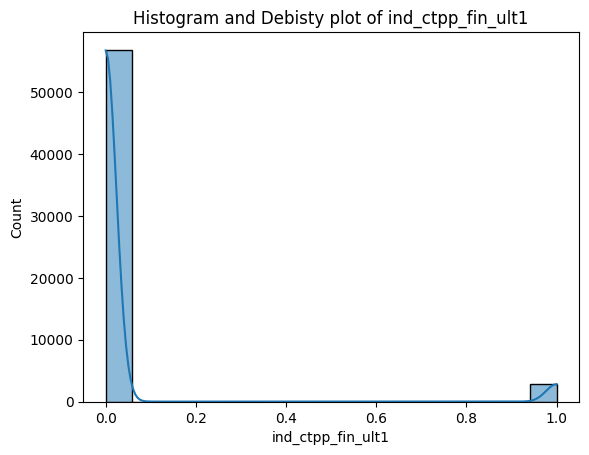

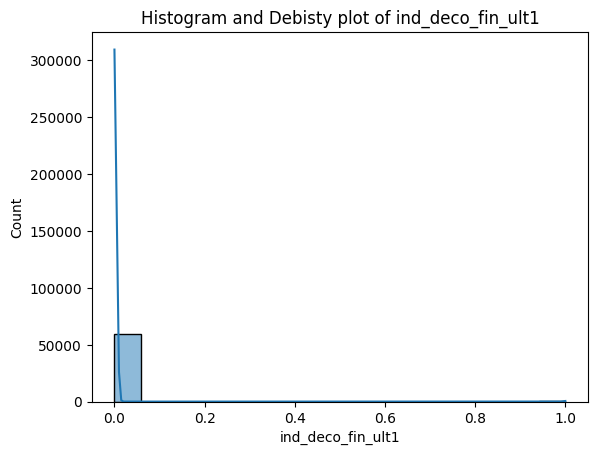

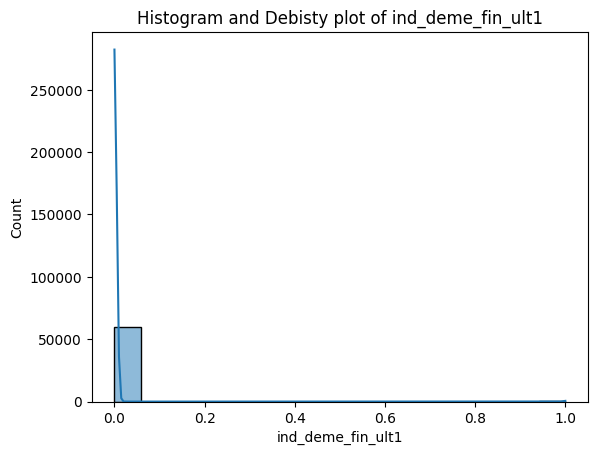

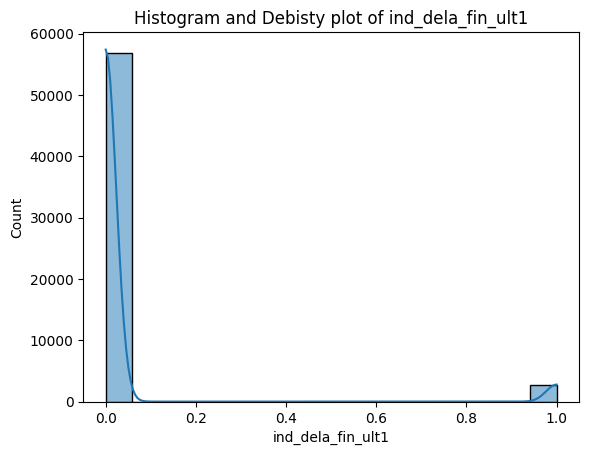

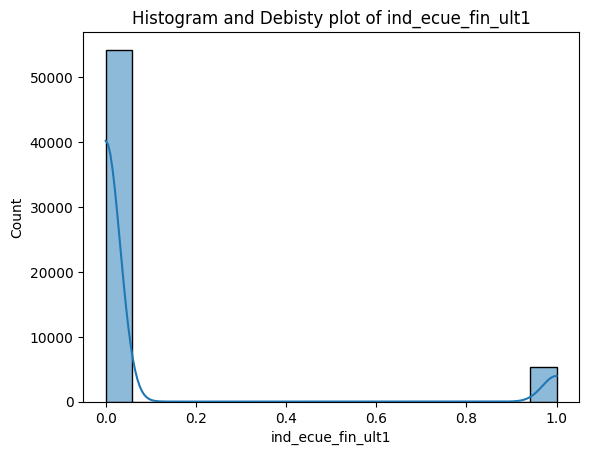

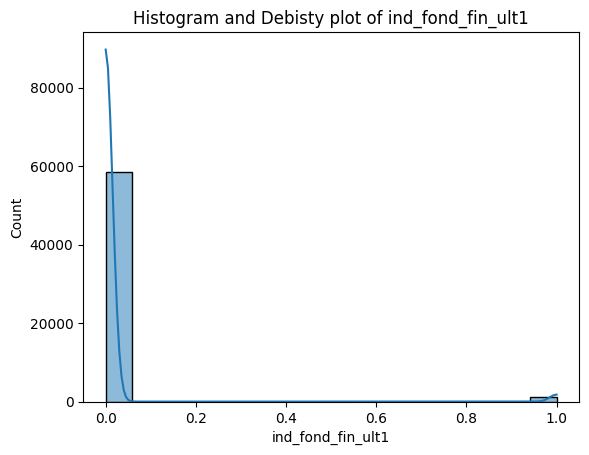

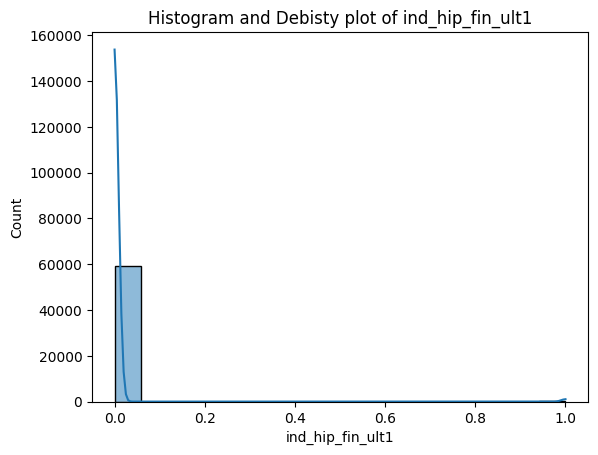

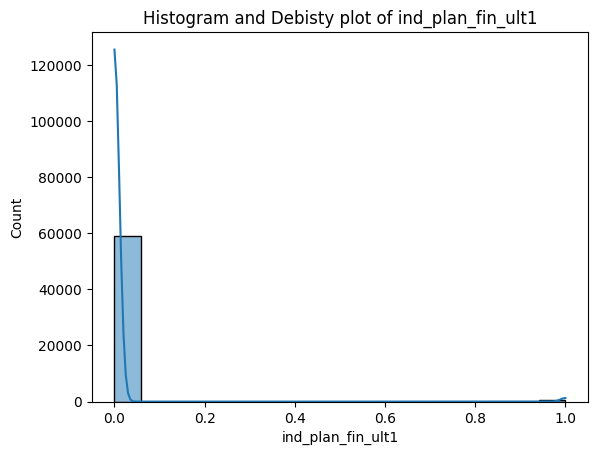

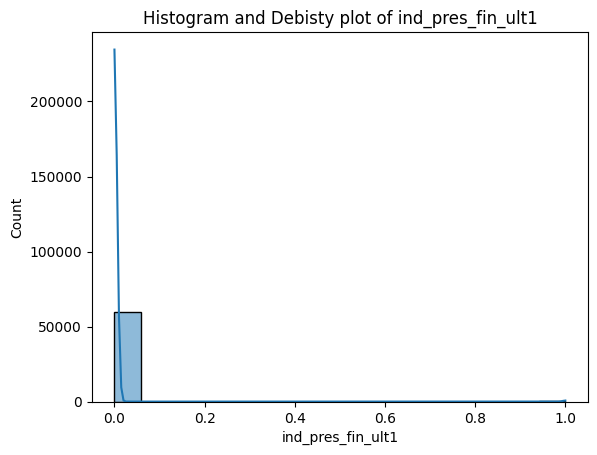

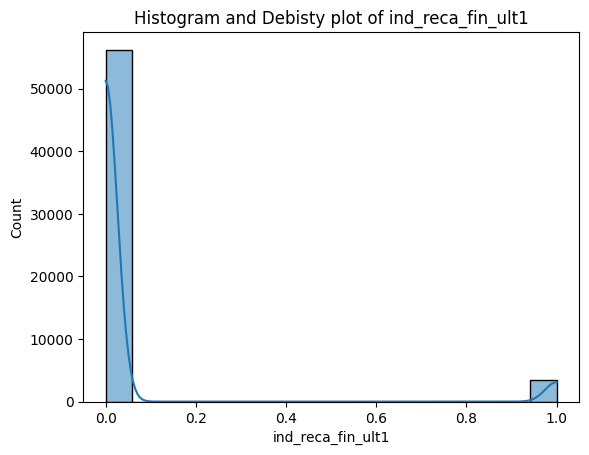

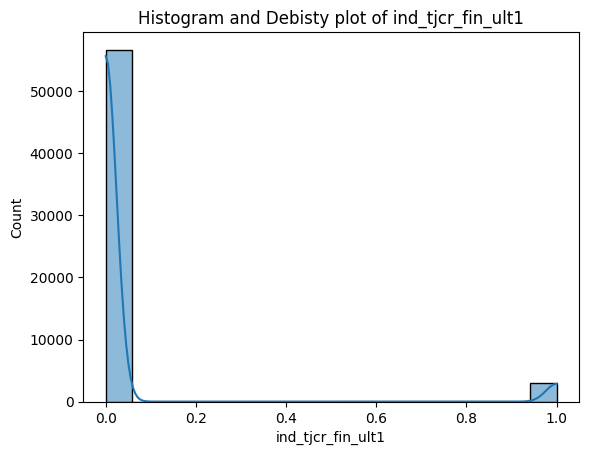

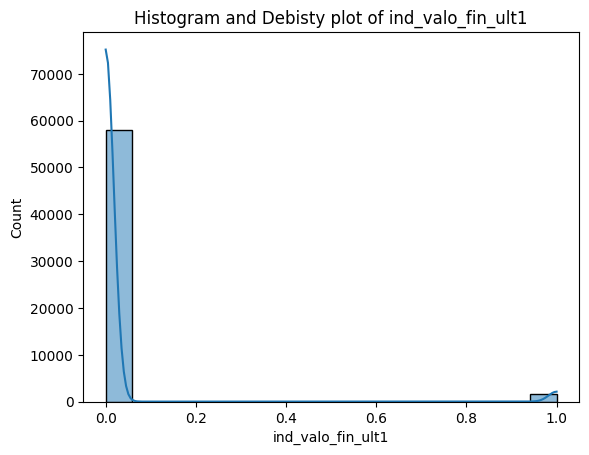

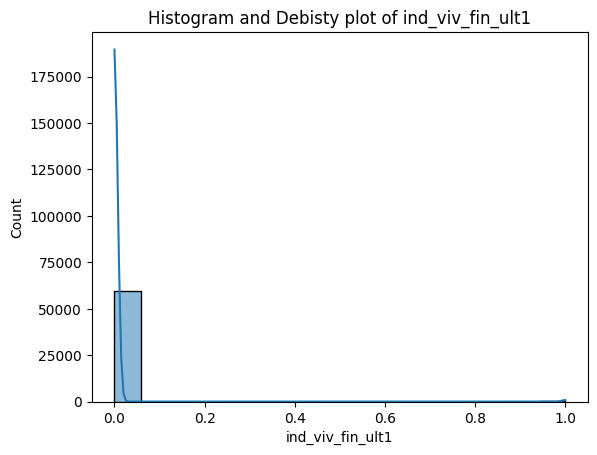

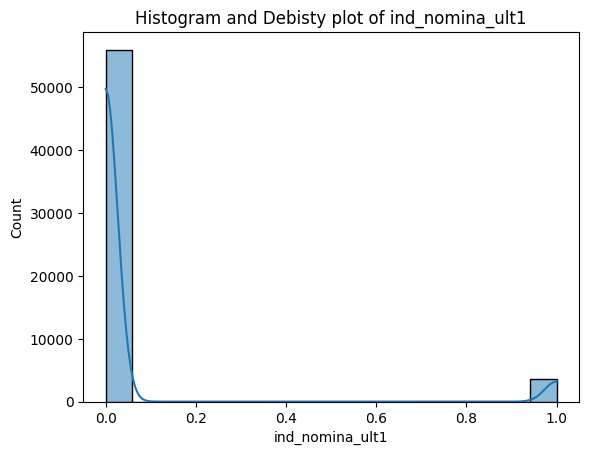

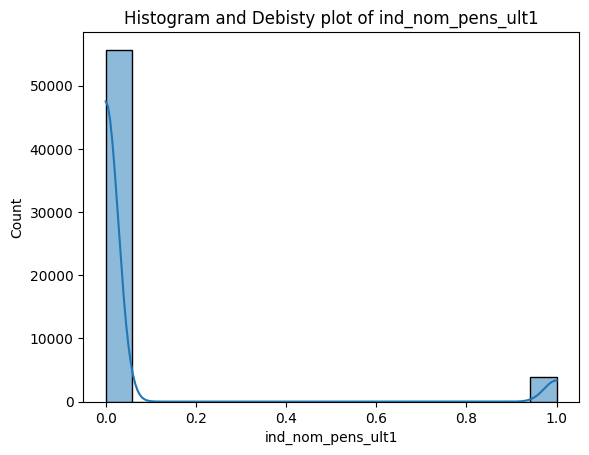

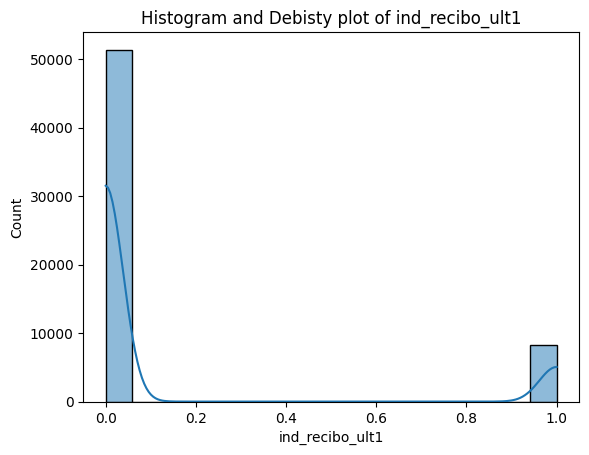

In [37]:
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram and Debisty plot of {col}")
    plt.show()

This code allows me to see the distribution of values in each column. I need to remove ncodpers because it is a customer code, which is not important. I should also remove the column ind_nuevo because the majority of its values are 0, which does not help in making predictions. Similarly, I do not think indrel is important.

I am examining the distribution of the target columns, which are categorical and provide a yes or no answer. If the majority of the targets are 0 or 1, I think they should be removed because they do not help during prediction. For example, ind_ahor_fin_ult1 has a majority of 0, so I think it should be removed. The same goes for ind_cder_fin_ult1, ind_ctju_fin_ult1, ind_ctma_fin_ult1, ind_deco_fin_ult1, ind_deme_fin_ult1, ind_hip_fin_ult1, ind_plan_fin_ult1, ind_press_fin_ult1, and ind_viv_fin_ult1. This will reduce the number of target columns, making predictions more precise.

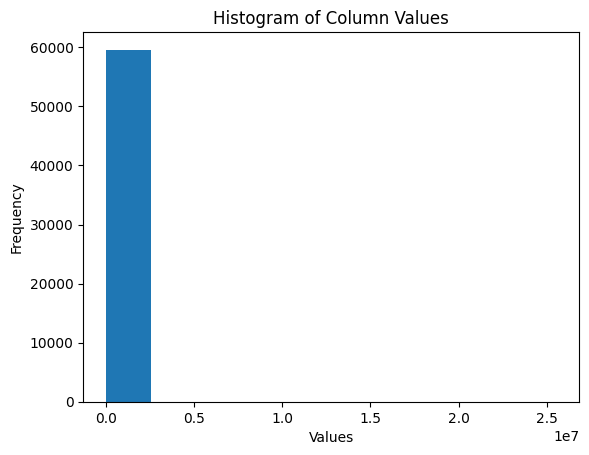

In [38]:
plt.hist(df['renta'], bins=10)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column Values')
plt.show()

In [39]:
Q1 = df['renta'].quantile(0.25)
Q3 = df['renta'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = max(0, Q1 - 1.5 * IQR)  # Ensuring the lower bound is not negative
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['renta'] < lower_bound) | (df['renta'] > upper_bound)]

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: 0
Upper bound: 290078.06999999995


In [40]:
Q1 = df['renta'].quantile(0.25)
Q3 = df['renta'].quantile(0.75)
 
IQR_15 = (Q3 - Q1) * 1.5
 
low = Q1 - IQR_15 
high = Q3 + IQR_15
 
median = df['renta'].median()
 
df.loc[df['renta']>high, col] = Q3

In [41]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
# Ensure that the lower bound doesn't go below 0
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: 0
Upper bound: 90.0


I balanced and normalized the data. Previously, it ranged from 0 to 290078.069, but now it is normalized with no outliers, ranging between 0 and 90.

In [43]:
duplicates=df.duplicated().sum()
print("Number of Duplicate Records:", duplicates) 

Number of Duplicate Records: 0


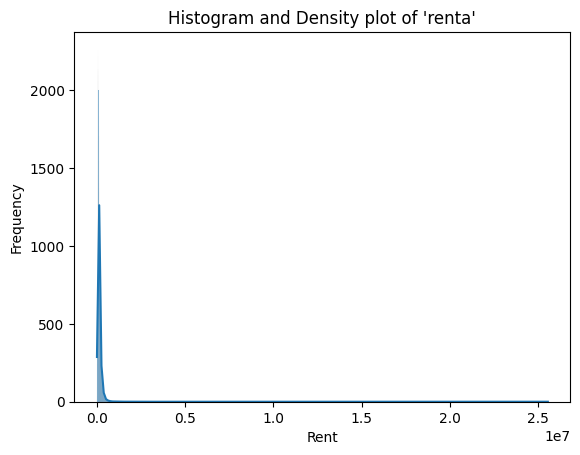

In [44]:
sns.histplot(df['renta'], kde=True)
plt.title("Histogram and Density plot of 'renta'")
plt.xlabel("Rent")
plt.ylabel("Frequency")
plt.show()

I'm not sure if I did this correctly because there are still some outliers, but I will use a machine learning model that can handle outliers.


In [45]:
df.drop(columns=['tipodom', 'ncodpers', 'ind_nuevo', 'ind_ahor_fin_ult1', 'ind_cder_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1','ind_deco_fin_ult1', 'ind_deme_fin_ult1','ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',  'ind_viv_fin_ult1'], inplace=True)

In [46]:
print(df.columns)

Index(['fecha_dato', 'ind_empleado', 'pais_residencia', 'sexo', 'age',
       'fecha_alta', 'antiguedad', 'indrel', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'canal_entrada', 'indfall', 'cod_prov', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1'],
      dtype='object')


In [47]:
num_columns = df.shape[1]
print("Number of columns in the dataset:" , num_columns)

Number of columns in the dataset: 33


now there is a total of 33 rows because I removed a lot of unnecessary columns.

In [48]:
df.drop(columns=['fecha_dato', 'fecha_alta'], inplace=True)

In [49]:
df.dtypes


ind_empleado              object
pais_residencia           object
sexo                      object
age                      float64
antiguedad                object
indrel                   float64
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
canal_entrada             object
indfall                   object
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cno_fin_ult1           int64
ind_ctop_fin_ult1          int64
ind_ctpp_fin_ult1          int64
ind_dela_fin_ult1          int64
ind_ecue_fin_ult1          int64
ind_fond_fin_ult1          int64
ind_reca_fin_ult1          int64
ind_tjcr_fin_ult1          int64
ind_valo_fin_ult1          int64
ind_nomina_ult1          float64
ind_nom_pens_ult1        float64
ind_recibo

In [50]:
for column in df.columns:
 unique_values_counts = df['sexo'].value_counts()
print(unique_values_counts)


sexo
V    32447
H    27178
Name: count, dtype: int64


I want to encode this to 0 or 1 to make it easier for the model to read.

In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sexo'] = label_encoder.fit_transform(df['sexo'])


In [52]:
df.drop(columns=['ind_empleado', 'pais_residencia', 'indrel_1mes', 'indresi', 'indfall'], inplace=True)

These are unimportant features that need to be removed. they are not going to help with the prediction.

In [53]:
df['tiprel_1mes'].replace(to_replace=["I", "A", "P"], value=[0, 1, 0], inplace=True)

In [54]:
df['segmento'].replace(to_replace=["02 - PARTICULARES", "03 - UNIVERSITARIO", "01 - TOP"], value=[2, 3, 1], inplace=True)

In [55]:
print(df.columns)

Index(['sexo', 'age', 'antiguedad', 'indrel', 'tiprel_1mes', 'indext',
       'canal_entrada', 'cod_prov', 'nomprov', 'ind_actividad_cliente',
       'renta', 'segmento', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')


In [56]:
label_encoder = LabelEncoder()
df['indext'] = label_encoder.fit_transform(df['indext'])

In [57]:
label_encoder = LabelEncoder()
df['canal_entrada'] = label_encoder.fit_transform(df['canal_entrada'])

In [58]:
label_encoder = LabelEncoder()
df['nomprov'] = label_encoder.fit_transform(df['nomprov'])

In [59]:
label_encoder = LabelEncoder()
df['antiguedad'] = label_encoder.fit_transform(df['antiguedad'])

I encoded all the features that were labeled as objects because it will be easier for data visualization

# **Data Visualization**

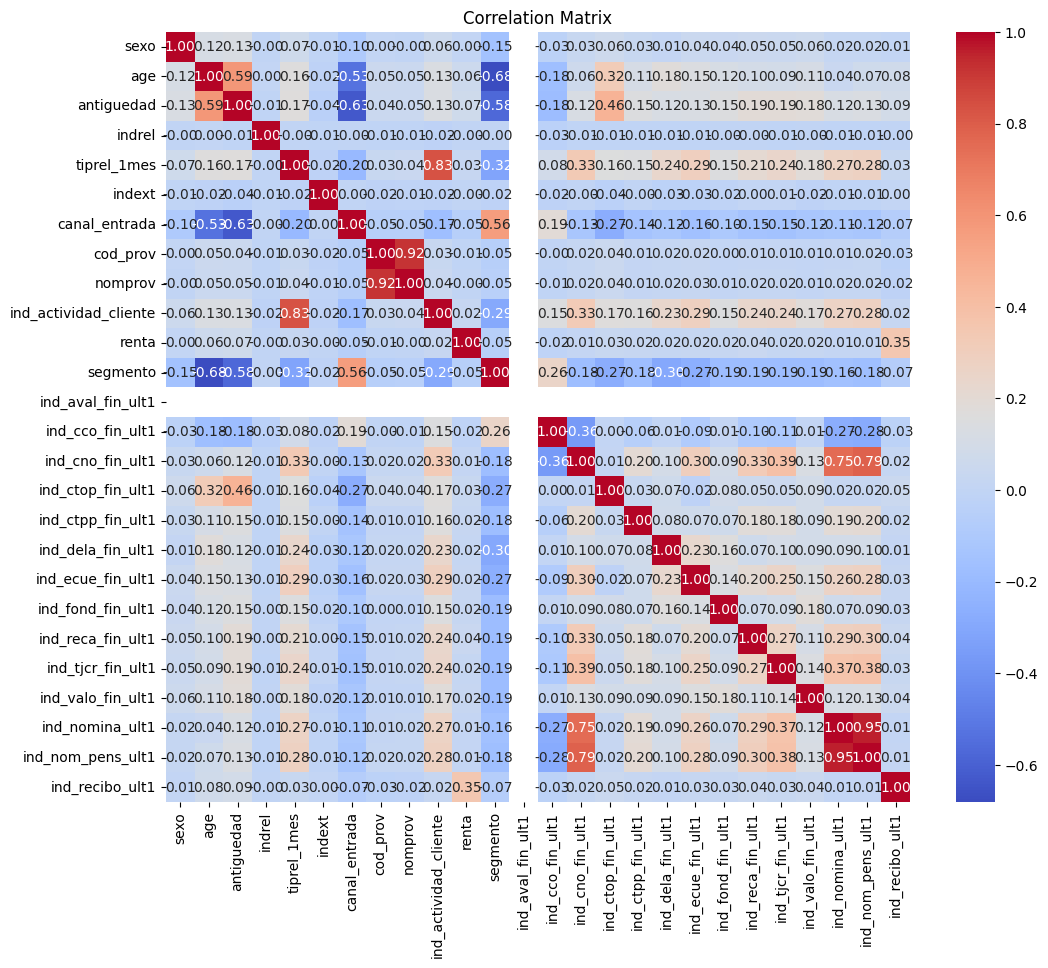

In [60]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

At this point, I have kept only the most important features and dropped the others. I also retained the most important results. You can see from the correlation between the target and the features that I selected the most important ones. From here, I would like to compare a few of the targets to gain a better understanding of the data.

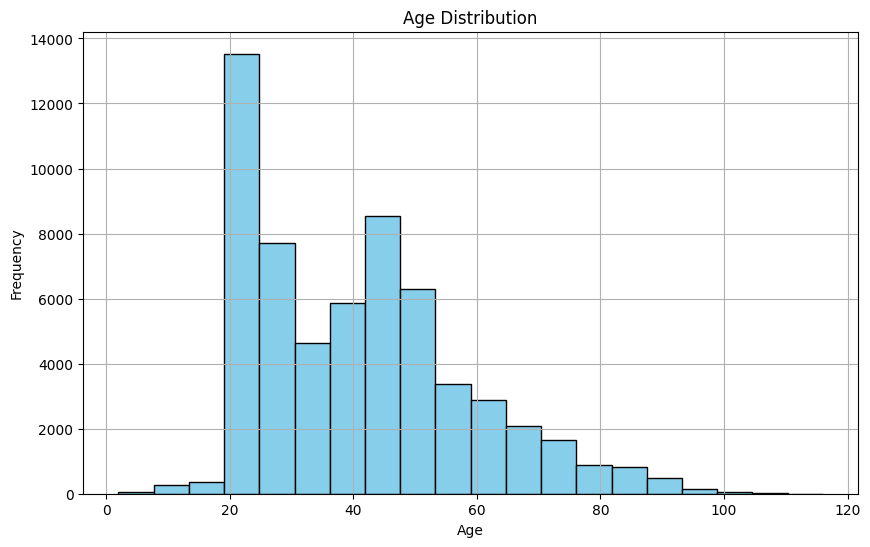

In [61]:



plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This gives us a better understanding of how age is distributed and it can be the main reason why different age groups might choose different houses. 

In [64]:
df.columns 

Index(['sexo', 'age', 'antiguedad', 'indrel', 'tiprel_1mes', 'indext',
       'canal_entrada', 'cod_prov', 'nomprov', 'ind_actividad_cliente',
       'renta', 'segmento', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

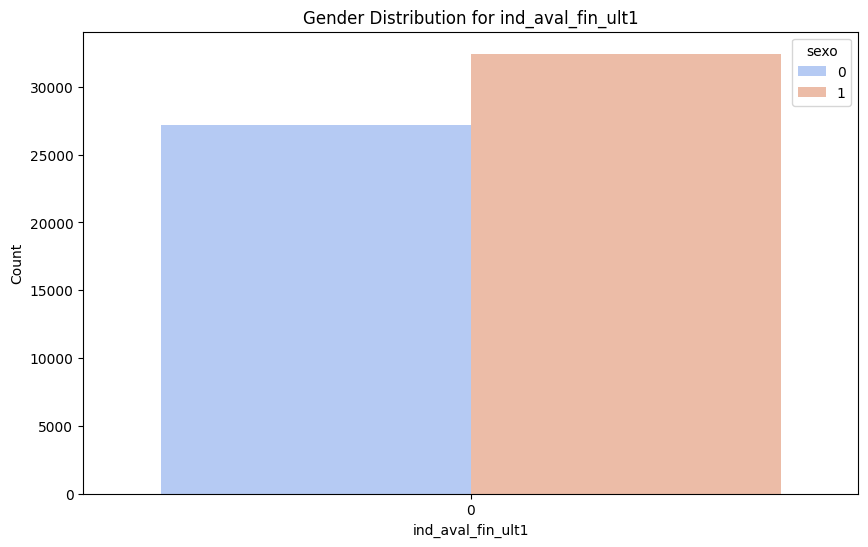

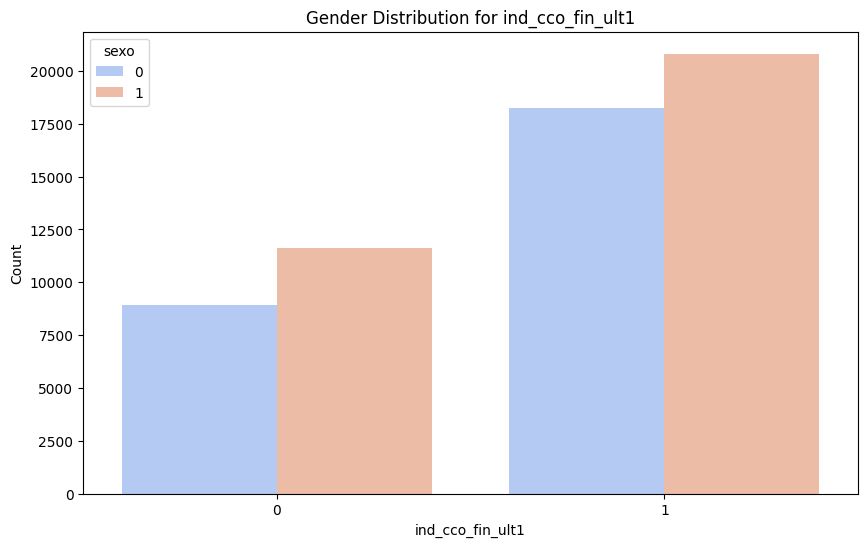

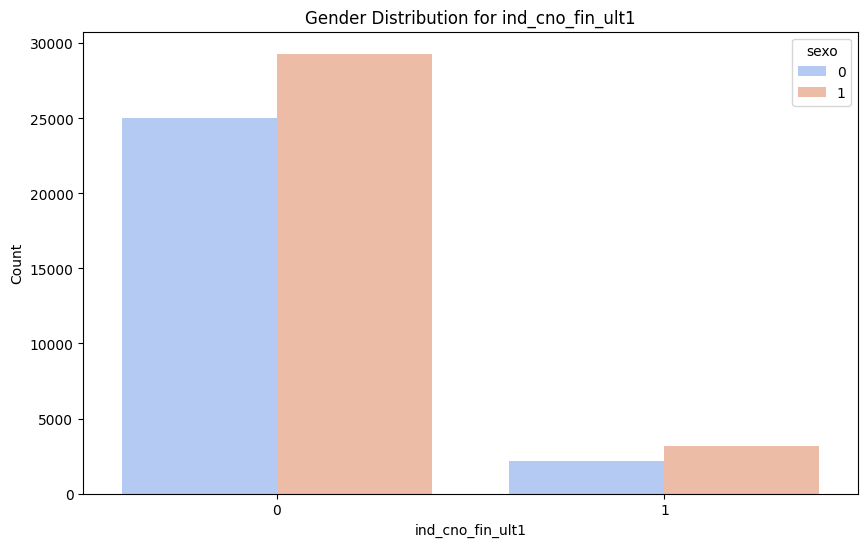

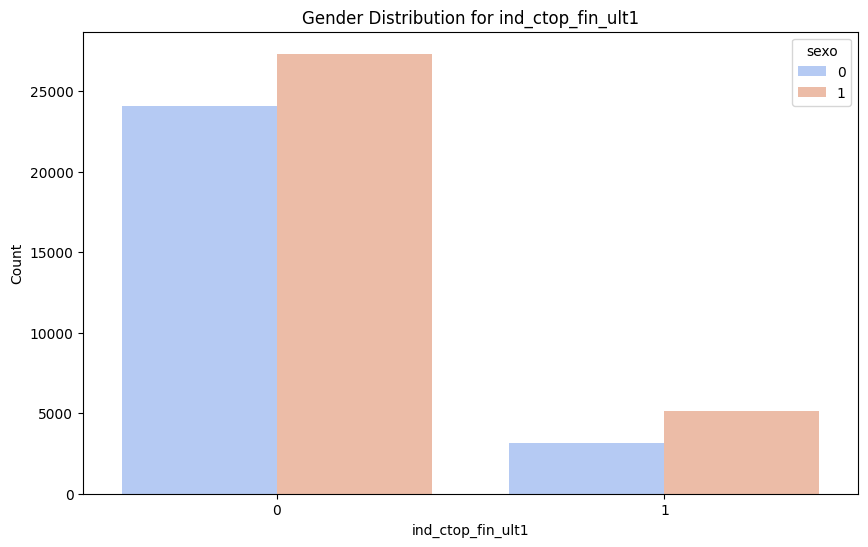

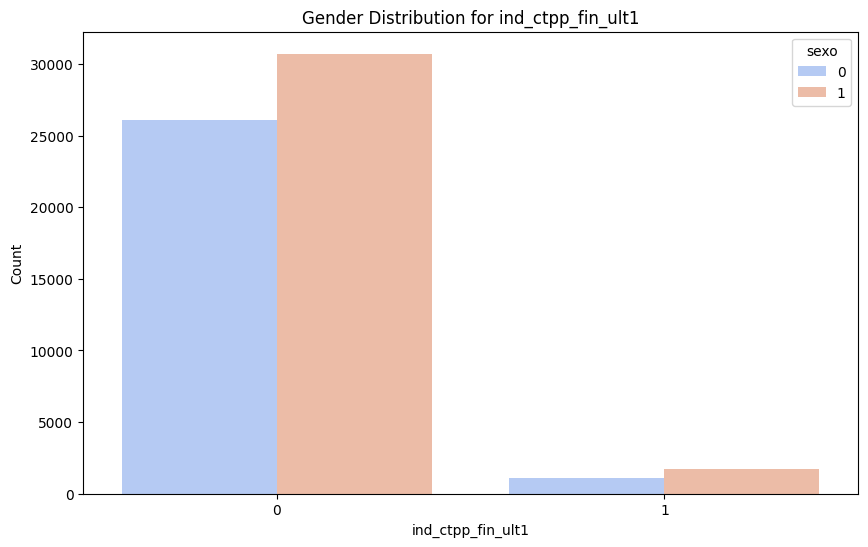

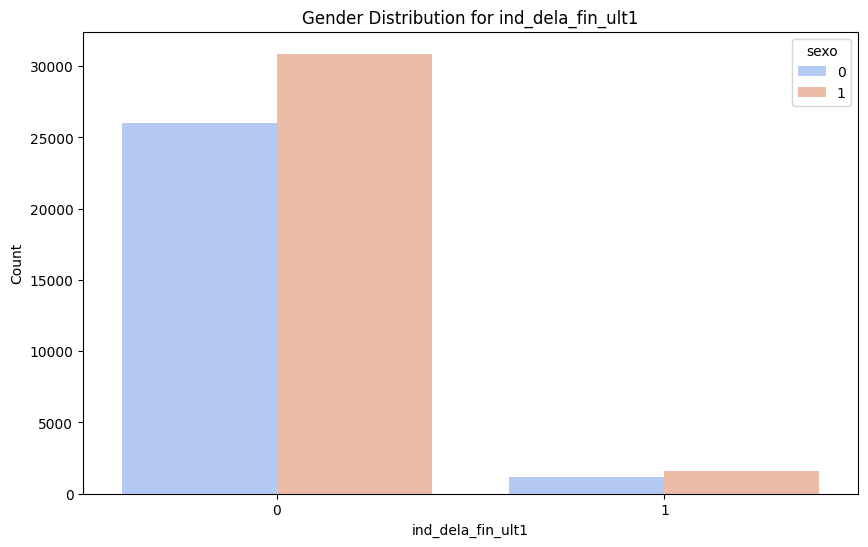

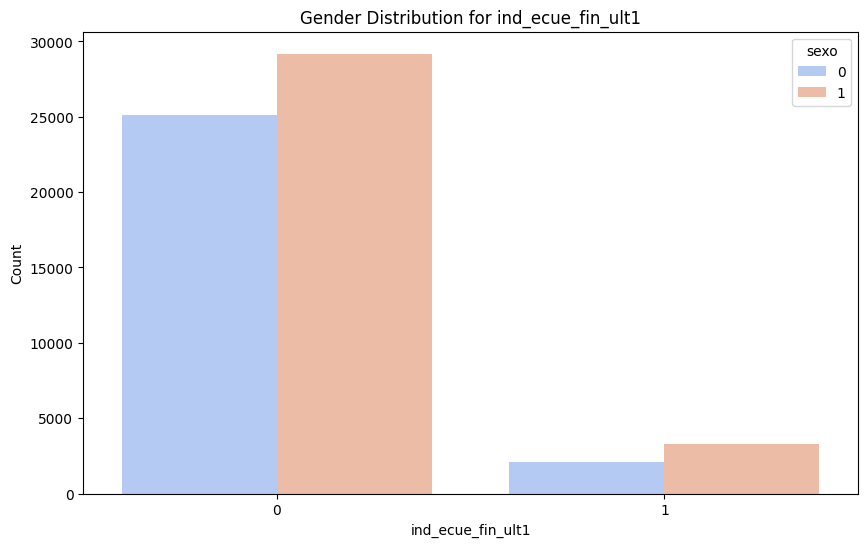

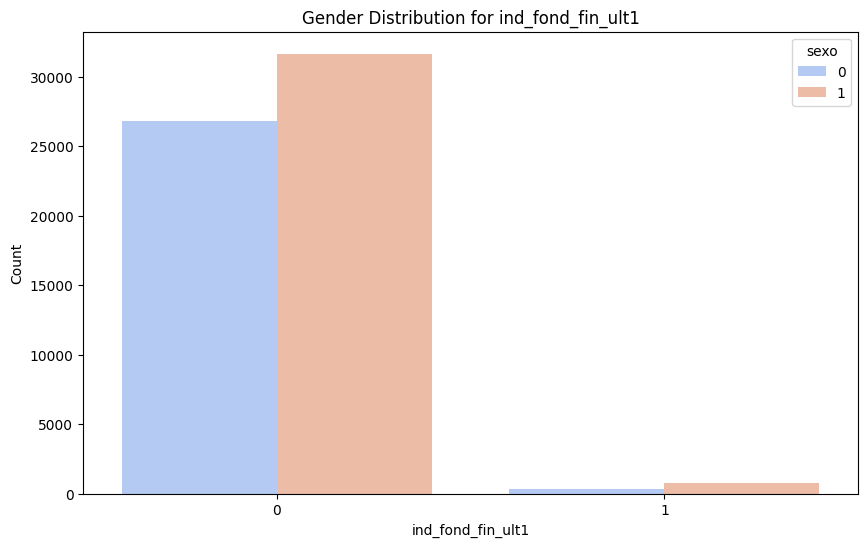

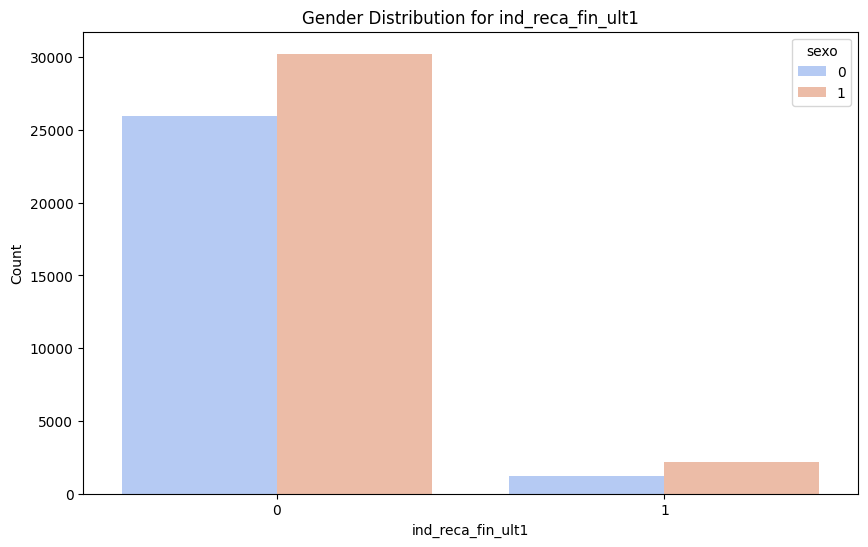

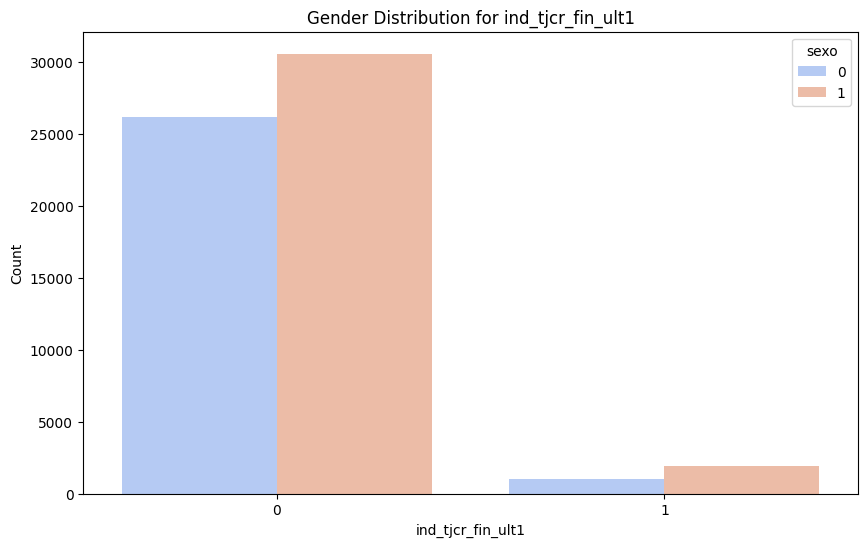

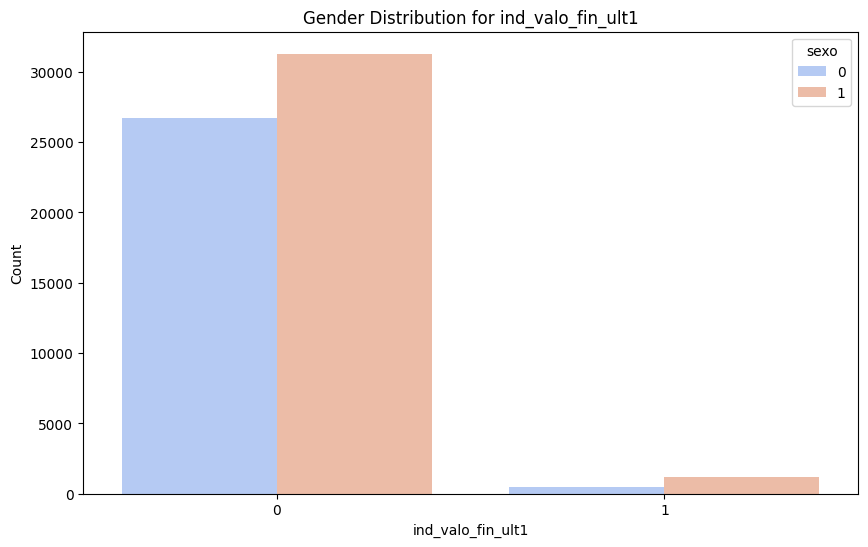

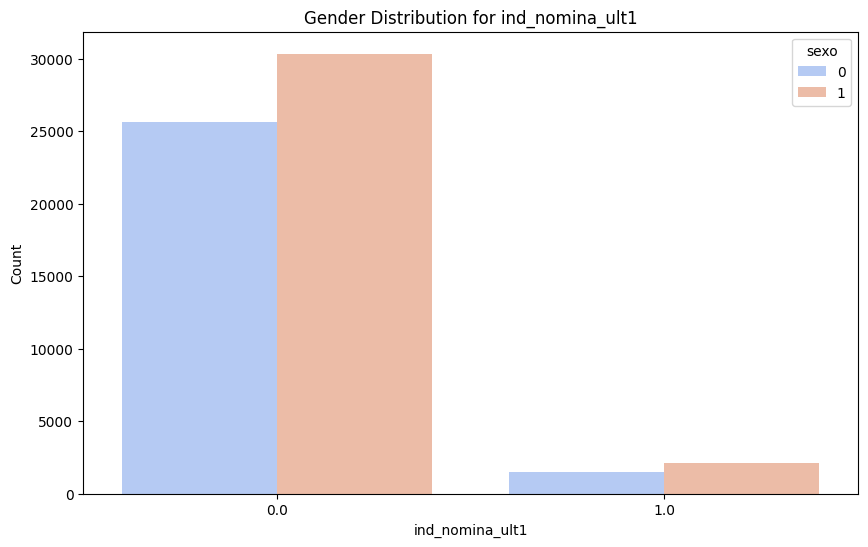

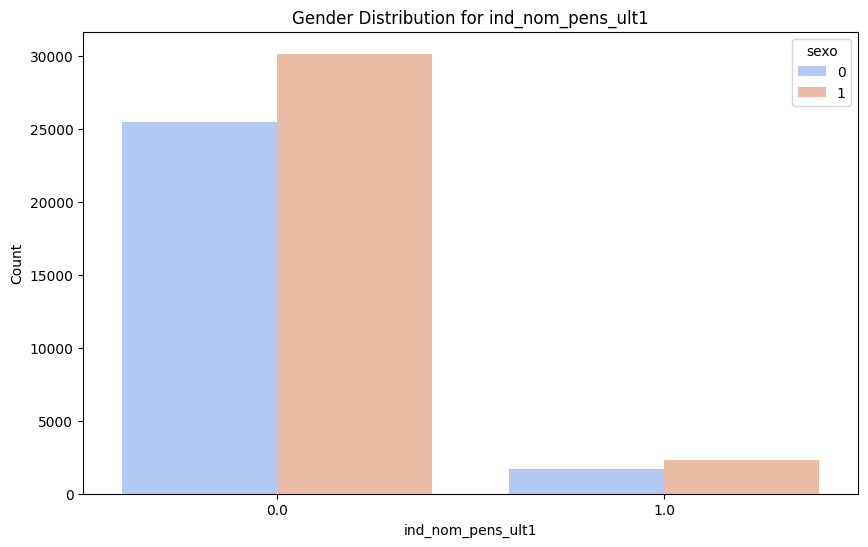

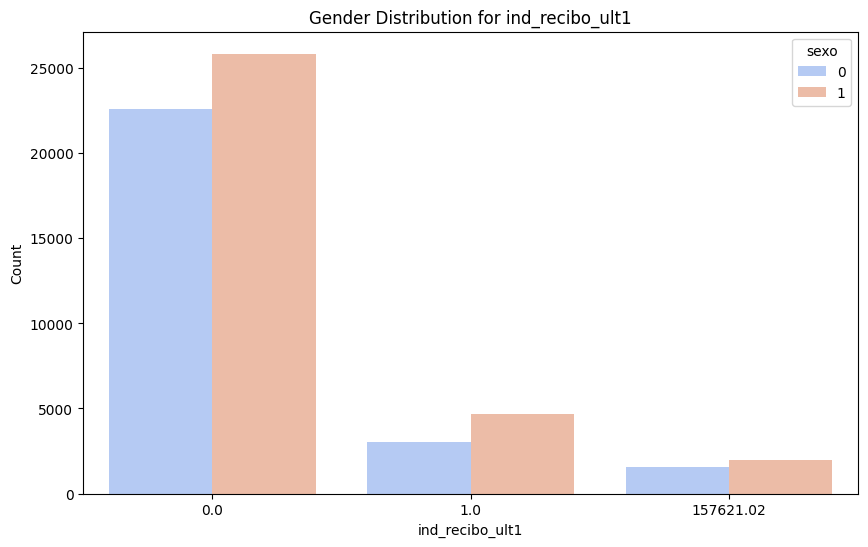

In [65]:
target_columns = ['ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
gender_column = 'sexo'  
for target_col in target_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=target_col, hue=gender_column, data=df, palette='coolwarm')
    plt.title(f'Gender Distribution for {target_col}')
    plt.xlabel(target_col)
    plt.ylabel('Count')
    plt.legend(title=gender_column)
    plt.show()


This allows us to see how each gender is distributed within the target. For example, in the target ind_tjcr_fin_ult1, it shows that more men are involved in it rather than women.


<Figure size 1200x600 with 0 Axes>

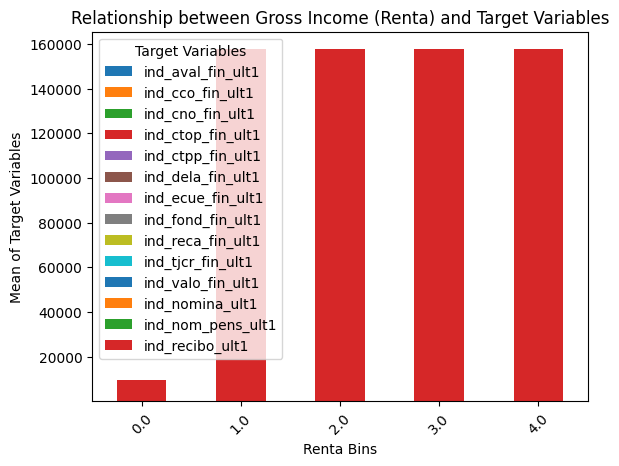

In [69]:
num_bins = 5
bin_edges = np.linspace(df['renta'].min(), df['renta'].max(), num_bins + 1)


df['renta_bin'] = pd.cut(df['renta'], bins=bin_edges, labels=False)


target_means = df.groupby('renta_bin')[target_columns].mean()


plt.figure(figsize=(12, 6))
target_means.plot(kind='bar', stacked=True)
plt.title('Relationship between Gross Income (Renta) and Target Variables')
plt.xlabel('Renta Bins')
plt.ylabel('Mean of Target Variables')
plt.xticks(rotation=45)
plt.legend(title='Target Variables')
plt.show()

I think I might have made a mistake when normalizing renta or removing outliers because I can only see one target variable here.


<Figure size 1200x600 with 0 Axes>

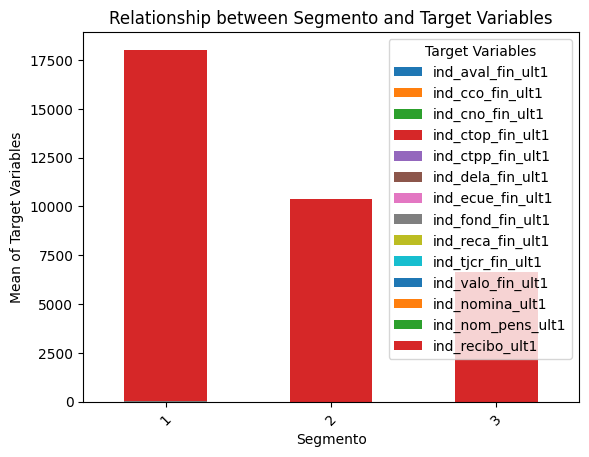

In [71]:
target_means_segmento = df.groupby('segmento')[target_columns].mean()


plt.figure(figsize=(12, 6))
target_means_segmento.plot(kind='bar', stacked=True)
plt.title('Relationship between Segmento and Target Variables')
plt.xlabel('Segmento')
plt.ylabel('Mean of Target Variables')
plt.xticks(rotation=45)
plt.legend(title='Target Variables')
plt.show()

Okay, the same thing happens with the segmento data, which is weird. I'm not sure if I should delete the code where I removed the outliers.

### **Machine Learning**

The two machine learning algorithms I chose are KNN and Decision Tree. KNN is good because it is a non-parametric algorithm, so it does not make assumptions about the data distribution.

Decision tree is good because you can visualize and understand the results based on domain expertise.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [74]:
df.columns

Index(['sexo', 'age', 'antiguedad', 'indrel', 'tiprel_1mes', 'indext',
       'canal_entrada', 'cod_prov', 'nomprov', 'ind_actividad_cliente',
       'renta', 'segmento', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'renta_bin'],
      dtype='object')

I want to keep only the columns sexo, age, tiprel_1mes, antiguedad, and segmento because I think those are the most important ones. Additionally, I want to retain only 6 of the target columns where you can see differences between each value. These targets are: Ind_aval_fin_ult1, Ind_cco_fin_ult1, Ind_recibo_ult1, Ind_ecue_fin_ult1, Ind_cno_fin_ult1, and ind_ctop_fin_ult1.

In [121]:
features = ['sexo', 'age', 'antiguedad', 'indrel', 'tiprel_1mes', 'indext',
            'canal_entrada', 'cod_prov', 'nomprov', 'ind_actividad_cliente',
            'renta', 'segmento']

X = df[features]
y_columns = [ 'ind_cco_fin_ult1', 
             'ind_ecue_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctop_fin_ult1']

y = df[y_columns]


In [122]:
numerical_features = ['antiguedad','cod_prov', 'nomprov']

numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())])
    


In [123]:
categorical_features = ['segmento', 'sexo', 'indrel','tiprel_1mes', 'indext','canal_entrada','ind_actividad_cliente']
categorical_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [124]:
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),
('cat', categorical_transformer, categorical_features)])

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=470)

In [126]:
dt_pipeline=Pipeline(steps=[('preprocessor', preprocessor),
('classifier', DecisionTreeClassifier(max_depth=5, random_state=40000))])

In [127]:
dt_pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['antiguedad', 'cod_prov',
                                                   'nomprov']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['segmento', 'sexo', 'indrel',
                                                   'tiprel_1mes', 'indext',
                                                   'canal_entrada',
                                                   'ind_actividad_cliente'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=40000))])

In [128]:
columns_to_convert = ['ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_recibo_ult1',
                      'ind_ecue_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctop_fin_ult1']

df[columns_to_convert] = df[columns_to_convert].astype(int)


In [105]:
y_pred_dt = dt_pipeline.predict(X_test)

In [113]:
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred_dt:", np.unique(y_pred_dt))
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred_dt:", y_pred_dt.shape)


Unique values in y_test: [     0      1 157621]
Unique values in y_pred_dt: [0 1]
Shape of y_test: (17888, 6)
Shape of y_pred_dt: (17888, 6)


In the unique values in y_test, it shows that there are three unique values. y_pred_dt contains two unique values. When I tried to use classification metrics, the differences in unique values caused errors. Because of this, I had to remove some of the target variables and select the ones with common values to avoid further errors.


In [129]:
y_pred_dt = dt_pipeline.predict(X_test)

In [130]:
accuracy_ti = accuracy_score(y_test, y_pred_dt)
accuracy_ti

0.5832401610017889

### **KNN**

In [132]:
knn_pipeline=Pipeline(steps=[('preprocessor', preprocessor),
('classifier', KNeighborsClassifier(n_neighbors=5))])


In [133]:
knn_pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['antiguedad', 'cod_prov',
                                                   'nomprov']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['segmento', 'sexo', 'indrel',
                                                   'tiprel_1mes', 'indext',
                                                   'canal_entrada',
                                                   'ind_actividad_cliente'])])),
                ('classifier', KNeighborsClassifier())])

In [134]:
y_pred_knn = knn_pipeline.predict(X_test)

In [135]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn


0.5604315742397138

In [136]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
# KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("\nClassification Report:")
print("\nAccuracy Score:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))
print("\nClassification Report:")
print(classification_report(y_test, knn_predictions))
print("\nAccuracy Score:", accuracy_score(y_test, knn_predictions))



Classification Report:

Accuracy Score: 0.5122987477638641
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     11703
           1       0.27      0.29      0.28      1601
           2       0.28      0.29      0.28      1591
           3       0.45      0.46      0.45      2537

   micro avg       0.61      0.61      0.61     17432
   macro avg       0.44      0.44      0.44     17432
weighted avg       0.62      0.61      0.61     17432
 samples avg       0.51      0.51      0.50     17432


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.79      0.73     11703
           1       0.18      0.02      0.04      1601
           2       0.15      0.02      0.03      1591
           3       0.40      0.23      0.29      2537

   micro avg       0.64      0.57      0.60     17432
   macro avg       0.35      0.26      0.27     17432
weighted avg       0.54      0.57      0.54    

/home/bettynega/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bettynega/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bettynega/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bettynega/.local/lib/python3.1

### **Conclusion**

This is the second time doing this project, and originally I had an accuracy rate of 67%. This time around, the accuracy rate did go down, which might be because I used 3 of the targets instead of just one. I also think the accuracy rate would go up if I combined the targets instead of dropping them. I could have used cross-validation between the different features and targets to ensure I picked the right ones.

Among the models I used, the decision tree performed better with an accuracy of 58%. This could be because decision trees are known to handle both numerical and categorical datasets well.
